In [1]:
import sys
sys.path.append('..')

In [2]:
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

from core.utils import *

# Example

In [3]:
from PIL import Image

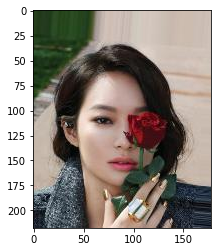

In [4]:
img = cv2.imread('/Users/Linsu Han/Documents/Data/celeba/raw/000507.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

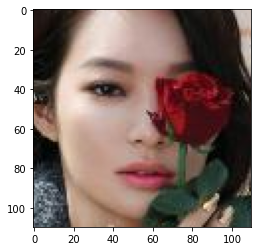

In [5]:
fc = cv2.CascadeClassifier('../resources/haarcascade_frontalface_default.xml')
x, y, w, h = get_coords(img, fc, 20)
rgb = cv2.cvtColor(img[y:y+w, x:x+h], cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

# Process

In [6]:
def process_imgs(dir_in, dir_out, path_haarcascade, tolerance):
    fc = cv2.CascadeClassifier(path_haarcascade)
    paths_img = glob.glob(dir_in + '*.jpg')
    for path_img in tqdm(paths_img):
        img_cv2 = cv2.imread(path_img)
        coords = get_coords(img_cv2, fc, tolerance)
        if coords is not None:
            x, y, w, h = coords
            cv2.imwrite(dir_out + path_img.split('\\')[-1], img[y:y+w, x:x+h]) # for linux use .split('/')

In [7]:
dir_in = '/Users/Linsu Han/Documents/Data/celeba/raw/'
dir_out = '/Users/Linsu Han/Documents/Data/celeba/clean/'
path_haarcascade = '../resources/haarcascade_frontalface_default.xml'
tolerance = 20
process_imgs(dir_in, dir_out, path_haarcascade, tolerance)

100%|█████████████████████████████████████████████████████████████████████████| 202599/202599 [16:42<00:00, 202.03it/s]
